<a href="https://colab.research.google.com/github/purvabadhe/Practice-DL-Codes/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import numpy as np
import warnings
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import keras
from keras import backend as K

Using TensorFlow backend.


In [ ]:
from keras.layers import Dense,Activation
# from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout
from keras.models import Sequential

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.head()

,0,865.2464729,427.7640271,285.1167731,158.6797042,156.3101013,138.2521231,95.98121458,84.64140458,76.09090637,59.75507631,66.43484265,63.95130004,60.09954316,55.93656558,66.90997638,52.38567835,58.6502357,48.23111285,50.33089531,59.90811423,62.2251846,44.65372243,48.54200916,51.86602004,57.82816446,71.09411043,47.50444306,1021.334417,413.0818037,417.6715377,209.2564916,191.0343457,207.9751932,147.8221802,93.06523777,65.33961556,101.5679849,79.46487142,68.80855785,...,20.79762781,14.55775613,17.03317176,22.61927247,19.79276171,20.17997819,17.59974858,15.13986765,18.02374707,18.50597602,23.71961762,18.53216589,22.32523685,21.28318325,13.84064241,20.90343903,23.32948247,18.20965255,17.28146428,20.24922989,15.73819247,15.01535505,20.87793645,18.67299464,19.93674221,22.14312373,18.54608477,20.65192483,19.23335658,15.14518961,19.13045853,24.01438504,16.59102324,24.12412307,16.18750729,16.81485816,16.35478265,17.8421456,21.71627061,target
0,0,916.951888,427.882939,265.639456,217.683708,177.108414,137.701149,87.138209,84.210086,80.771940,67.266882,70.704099,49.187955,60.661845,64.880157,61.555299,56.844290,51.862626,43.548822,44.702686,53.099256,54.814100,54.195900,46.908525,52.387701,76.218882,69.646612,45.181970,954.404686,437.352657,422.544714,250.007549,242.614752,196.440945,148.024556,105.173733,86.515422,87.375639,76.998433,81.299183,...,19.542973,19.654482,18.313864,21.698420,24.061824,23.184702,19.337895,17.602714,19.997297,16.128037,14.725535,19.122992,20.765162,19.584419,18.758919,20.231097,17.428418,16.023137,21.210916,17.565949,20.608008,20.819589,19.877969,19.385148,17.485700,20.737754,20.899478,19.617238,18.108589,18.543115,16.224942,19.172917,23.875644,24.000087,20.475843,17.992954,21.511318,16.063710,17.674887,1
1,0,875.870226,381.954212,253.903449,130.759546,150.966488,140.441411,76.152186,82.256108,67.513634,61.000037,54.329763,64.538102,65.319985,68.972451,53.267254,54.461655,54.041937,52.249585,44.300764,54.220113,55.693526,43.983490,51.016159,49.174942,51.402274,65.982651,51.056695,979.694256,471.664182,406.648588,226.741489,198.317776,183.257171,151.538828,103.448105,87.080990,72.640570,64.425610,68.387764,...,17.417436,16.405240,16.102184,18.243211,17.864210,14.381707,12.239350,16.632369,14.678502,14.463385,11.974864,12.390154,14.981089,13.920450,15.126171,14.545885,18.196049,15.961699,14.089505,15.409130,13.408903,12.165762,12.053287,12.306216,13.869477,13.557657,14.164327,11.624577,15.100996,16.212955,17.365110,17.587226,18.265620,14.882673,13.510211,16.555225,15.849353,16.314646,13.154324,1
2,0,893.550827,407.079283,383.999632,252.320335,178.462154,128.220516,91.854767,83.250061,90.606671,64.566771,64.892237,86.239473,55.630726,60.470652,51.581343,52.659744,50.741526,60.534475,64.092121,40.332242,45.852656,44.595958,50.177093,57.902560,59.562633,61.845572,52.120560,1035.019223,356.775755,395.571914,298.663612,267.644406,179.267868,118.273978,104.757120,78.803390,86.524116,80.481257,87.893479,...,24.431494,23.832009,27.981507,26.695634,23.864923,20.239951,23.906831,27.422942,24.668568,27.683244,24.621823,25.283925,22.623685,30.585676,29.621742,26.553269,28.587571,33.593943,29.909054,31.519946,24.525845,27.115159,21.308060,21.271714,26.625474,17.515261,27.815625,33.150874,23.104999,28.277291,25.703649,27.043778,24.642206,30.481024,27.347597,32.280424,19.699926,28.499108,26.829111,2
3,0,947.055404,416.568021,307.893477,200.808392,149.141397,118.061878,99.472201,89.930215,81.522465,69.340990,68.731116,65.059314,48.554912,53.614054,58.677930,51.140296,52.204978,56.400450,49.696396,45.899465,48.832180,50.819924,54.077885,53.425758,41.876934,47.628319,46.383886,1019.388774,404.583704,381.922837,256.725916,225.424138,142.670117,124.116191,97.185582,75.676101,90.885595,66.365455,74.858729,...,30.857085,28.364528,35.561221,28.338688,19.603987,27.723288,24.536892,23.750841,23.530947,18.770498,36.179804,24.585695,24.856503,36.913929,35.331264,22.855723,23.517923,21.871812,22.407509,27.268391,19.874035,22.218385,29.64793

In [ ]:
test.head()

,0,220.58404001241027,186.99805873723062,159.720100071226,82.46678294409712,96.45519847873918,49.92294731446251,49.16109822847334,62.674339741524534,28.720279829704406,54.760628361745745,53.07966045500402,60.96712342270241,49.09619516241864,45.29088135218722,48.345039964838854,42.11865183051213,38.26636521425948,35.07229057812001,47.267213592028334,44.946613123495666,47.77594769364055,44.737246990709544,37.24548906234925,59.545140575371,40.144275565918235,46.733839451914776,35.066550076216274,547.540911960705,161.46211423415994,159.81958485728103,80.04891802164168,99.85487208704514,80.21401567423932,56.89596353068208,67.90985807848901,71.04562118428787,38.97021425823962,57.62821770426549,51.847435969616726,...,19.055551432549805,20.461791027171596,22.915637022016245,18.62316399860639,21.873023443190736,17.258840515274297,20.032912159989767,19.952569335929475,11.558810096600855,16.94382108511885,16.258294682428357,21.1095647720557,21.734998491361246,25.143316775541784,16.646040769350797,18.222299043574772,24.4513505511432,25.88219089259517,27.29105115513361,21.661173045873102,22.632905591089585,21.96984910655805,16.85015279392676,18.95888486435822,19.173197464373807,13.452706480108912,21.249144369777085,24.95691330898093,20.482082808209533,19.769774616794425,20.623038687471205,24.85989473305373,20.61899727666786,18.38977680410962,16.45709262512275,16.860187456205857,15.971592505065413,15.684891370775073,17.197319198394528,target
0,0,269.897138,165.033199,158.299726,91.129880,91.125869,67.780340,50.566551,56.005204,50.085963,49.789828,53.179342,54.692240,42.413746,39.539162,36.568217,41.721621,34.104856,43.089301,46.409033,35.859997,39.035222,40.966449,38.228182,39.574051,35.411531,41.108700,33.364274,521.993837,194.238455,194.332794,97.484542,99.302652,71.188685,68.488806,60.008611,49.725698,50.915608,47.257888,49.011099,...,12.094310,17.132472,18.520518,16.563494,14.334906,16.305123,16.967059,17.845383,18.931863,17.255505,17.588247,17.836520,15.824011,18.241135,16.181611,22.551581,18.916492,25.307858,24.640992,15.060104,12.488561,15.094894,18.769639,19.946992,18.900346,19.167718,17.624310,14.498738,16.030776,17.692839,17.077709,19.771977,15.830685,16.426235,18.176988,16.556319,22.579124,17.365980,17.421127,1
1,0,267.963540,166.129573,162.194396,73.637738,86.226782,62.117022,48.533066,49.405228,46.982757,51.090264,53.757097,54.364731,53.817235,34.628114,36.882695,40.667759,38.768522,45.573375,39.537739,46.379810,43.837493,33.519960,34.706783,44.890075,32.877220,48.030026,36.491970,588.176020,104.562908,185.314698,90.715190,79.598722,70.875609,60.505781,53.803159,54.785033,49.356062,45.397941,52.521512,...,19.218034,22.393951,13.905179,18.025509,21.939350,17.752817,14.336299,15.954739,14.220379,12.354117,16.164722,11.470157,12.951827,17.572792,15.037314,24.046387,18.269999,15.814217,24.423867,9.876427,16.022230,16.028273,15.191226,14.301613,17.659976,11.701701,20.860477,16.948806,15.719745,19.968676,19.018441,15.642623,20.399732,18.634293,16.498999,15.800660,18.265734,14.568650,11.188276,1
2,0,302.742164,171.079868,127.740105,101.336951,113.646396,49.995661,41.655272,54.449361,49.535100,52.040178,45.249575,63.842570,42.999724,40.557376,34.336650,39.143485,34.372170,37.064801,20.290229,33.464180,35.169392,35.689633,28.345183,44.370814,26.002741,28.754048,45.965412,458.001998,190.286907,165.007118,91.975248,95.016730,79.979881,61.843359,27.353116,48.651876,32.437666,43.344931,37.206510,...,20.323100,25.315498,16.951164,26.285855,20.568957,21.927851,24.283845,23.495536,17.943561,25.701919,23.184211,24.861690,19.178641,21.313219,28.703164,23.422294,18.156936,22.060538,23.837969,23.321783,32.910308,20.144594,21.012068,16.723143,16.269573,19.075415,19.040609,20.272323,20.390324,21.384948,15.746544,22.775553,17.565368,21.789000,19.838273,23.166068,22.714441,15.662937,24.260700,2
3,0,292.240603,150.717120,118.383321,78.297537,95.480498,62.254119,39.523374,48.824305,44.661023,54.628337,43.149935,51.343618,35.497371,43.633421,35.146103,30

In [ ]:
print("Shape of train",train.shape)
print("Shape of test",test.shape)
train.columns = list(range(0,3137))
test.columns = list(range(0,3137))

Shape of train (239, 3137)
Shape of test (89, 3137)


In [ ]:
import warnings
df = pd.concat([train, test],ignore_index = True)

In [ ]:
df1 = df.sample(frac = 1)
df1 = df1.reset_index(drop =True)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3097,3098,3099,3100,3101,3102,3103,3104,3105,3106,3107,3108,3109,3110,3111,3112,3113,3114,3115,3116,3117,3118,3119,3120,3121,3122,3123,3124,3125,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135,3136
0,0,445.955876,166.636495,161.099108,124.478354,101.412111,73.534223,80.972406,75.666394,64.160999,71.441454,59.881943,50.727401,55.531474,62.180573,56.669720,53.507929,48.190370,58.841325,60.333287,42.171131,41.028759,36.713505,43.283731,37.699490,44.741874,45.121093,42.534976,328.698922,139.638619,120.325422,123.010480,115.762834,87.615577,85.445242,85.677448,69.536278,54.763260,57.937308,59.931151,...,16.860096,18.235873,20.739282,15.373836,18.836109,16.622353,12.458223,17.393983,20.005153,21.415200,14.473700,22.047275,20.718526,17.709254,16.342495,16.547214,18.061811,16.102170,15.369965,19.754047,16.074733,15.134049,14.980194,13.987143,20.002992,20.722310,23.585910,17.402914,14.467654,16.156752,16.222602,17.674225,13.188913,15.027526,10.441111,12.261052,15.880503,14.964467,14.348572,9
1,0,335.763570,93.436512,64.591351,59.075165,65.139200,72.528421,79.972497,86.009332,68.797107,51.701851,54.361652,54.609212,56.494722,41.809117,53.182628,33.359926,31.654156,35.147271,30.817332,38.097633,33.713283,34.712695,30.052576,37.520685,38.965553,36.084028,31.627632,154.614906,248.859143,116.960393,68.497645,56.160528,65.339063,72.267204,55.490666,72.327799,73.577946,52.252468,38.486709,...,14.159301,10.987021,14.773372,11.841331,11.541241,15.915771,10.994780,18.566635,12.583564,12.440294,12.954421,22.739036,14.876509,18.776382,19.582729,19.368812,19.426933,23.156904,25.417969,20.732154,18.515815,19.949962,14.393327,15.298687,20.273392,11.529264,14.454215,15.622948,16.530609,14.338352,12.634462,14.554277,12.645075,11.339346,13.027546,11.067610,11.151656,13.945420,13.587145,8
2,0,302.742164,171.079868,127.740105,101.336951,113.646396,49.995661,41.655272,54.449361,49.535100,52.040178,45.249575,63.842570,42.999724,40.557376,34.336650,39.143485,34.372170,37.064801,20.290229,33.464180,35.169392,35.689633,28.345183,44.370813,26.002741,28.754048,45.965412,458.001998,190.286907,165.007118,91.975248,95.016730,79.979881,61.843359,27.353116,48.651876,32.437666,43.344931,37.206510,...,20.323100,25.315498,16.951164,26.285855,20.568957,21.927851,24.283845,23.495536,17.943561,25.701919,23.184211,24.861690,19.178641,21.313219,28.703164,23.422294,18.156936,22.060538,23.837969,23.321783,32.910308,20.144594,21.012068,16.723143,16.269573,19.075415,19.040609,20.272323,20.390324,21.384948,15.746544,22.775553,17.565368,21.789000,19.838273,23.166068,22.714441,15.662937,24.260700,2
3,0,826.523316,326.378844,303.667367,181.448978,153.997597,134.943840,116.540294,115.341233,103.814580,80.978023,58.114358,68.219188,52.801650,71.550445,68.089254,65.549338,66.673681,60.933208,48.280040,46.197616,51.090617,50.001869,35.092309,46.889779,45.929991,47.567232,55.657604,740.239504,465.652770,273.544002,178.074799,162.085775,136.387438,122.736177,115.914248,108.799248,92.032741,85.897360,52.294352,...,18.072709,14.810433,17.273029,19.058826,16.735205,17.564635,17.248130,21.863023,13.798778,15.420681,14.614174,31.801733,29.055066,22.021162,23.462506,22.029915,17.869550,20.247839,16.296317,15.290130,13.909897,17.845018,19.300510,16.640161,18.202918,20.965651,17.987138,20.432680,19.555501,20.190582,18.847190,18.406510,18.582250,16.129825,20.867978,19.571335,17.178486,17.974662,14.662585,3
4,0,359.914567,209.054337,121.654768,106.587872,103.612737,79.787574,75.295247,65.739414,58.058865,61.685560,45.188947,41.492642,39.867575,46.601106,43.163255,47.031517,38.090311,46.063203,40.146005,42.838469,41.262003,37.212755,41.679000,42.526478,40.069656,41.549952,42.406205,503.762087,212.884891,146.604878,83.011231,76.135010,106.896672,81.436000,47.855672,45.758058,41.800408,48.433303,42.325703,...,17.087714,16.408561,13.509499,17.335912,16.372006,21.408348,20.268374,12.79071

In [ ]:
data = df1.values
X = data[:,:3136]
Y = data[:,3136]

In [ ]:
Y = Y.reshape(Y.shape[0],1)

In [ ]:
Y = keras.utils.to_categorical(Y)
# y_test = keras.utils.to_categorical(y_test)

In [ ]:
X = X/ X.max()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size = 0.2, random_state = 304)

In [ ]:
y_test.shape

(66, 11)

In [ ]:

# define the keras model
model = Sequential()
model.add(Dense(128, input_shape = (3136,), activation='relu'))
model.add(Dense(256, activation='relu'))
# model.add(Dense(64, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(1024,activation = 'relu'))
#model.add(Dense(2048,activation = 'relu'))
# model.add(Dense(4096,activation = 'relu'))
model.add(Dense(11, activation='softmax'))

In [ ]:
import warnings
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
import warnings
history=model.fit(x_train,y_train,epochs=100,batch_size = 32,validation_data=(x_test,y_test))

Train on 262 samples, validate on 66 samples
Epoch 1/100
262/262 [==============================] - 0s 2ms/step - loss: 2.3781 - accuracy: 0.1107 - val_loss: 2.3782 - val_accuracy: 0.0455
Epoch 2/100
262/262 [==============================] - 0s 367us/step - loss: 2.3488 - accuracy: 0.0916 - val_loss: 2.3500 - val_accuracy: 0.1061
Epoch 3/100
262/262 [==============================] - 0s 365us/step - loss: 2.3356 - accuracy: 0.0954 - val_loss: 2.3319 - val_accuracy: 0.0455
Epoch 4/100
262/262 [==============================] - 0s 392us/step - loss: 2.3150 - accuracy: 0.1031 - val_loss: 2.3291 - val_accuracy: 0.1061
Epoch 5/100
262/262 [==============================] - 0s 409us/step - loss: 2.3089 - accuracy: 0.1679 - val_loss: 2.3282 - val_accuracy: 0.0606
Epoch 6/100
262/262 [==============================] - 0s 358us/step - loss: 2.3064 - accuracy: 0.0992 - val_loss: 2.3065 - val_accuracy: 0.1061
Epoch 7/100
262/262 [==============================] - 0s 368us/step - loss: 2.3061 - a

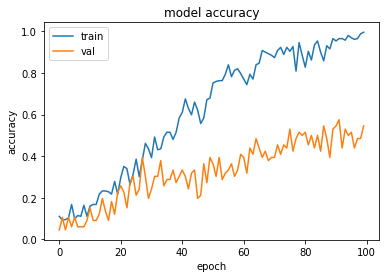

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

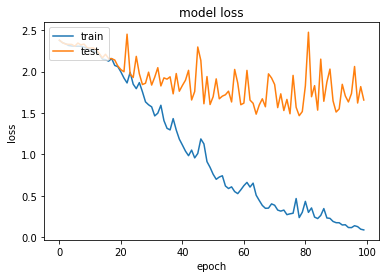

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()